In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("C:\\Coding\\machine learning\\CSV Files\\AIML Dataset.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.shape

(6362620, 11)

In [11]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [12]:
(df['isFraud'].value_counts()[1]/df.shape[0])*100

0.12908204481801522

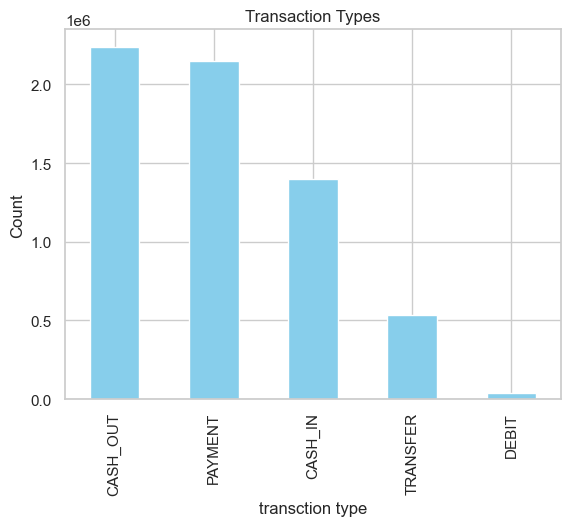

In [13]:
df["type"].value_counts().plot(kind="bar", title = "Transaction Types",color = "skyblue")
plt.xlabel("transction type")
plt.ylabel("Count")
plt.plot()
plt.show()

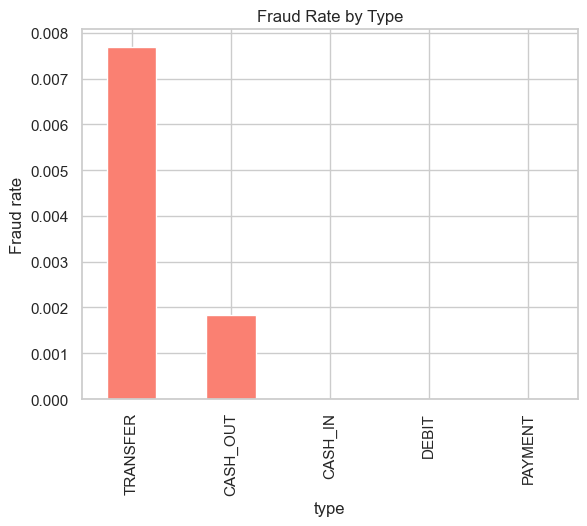

In [14]:
Fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
Fraud_by_type.plot(kind="bar", color="salmon")
plt.title("Fraud Rate by Type")
plt.ylabel("Fraud rate")
plt.show()

In [15]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

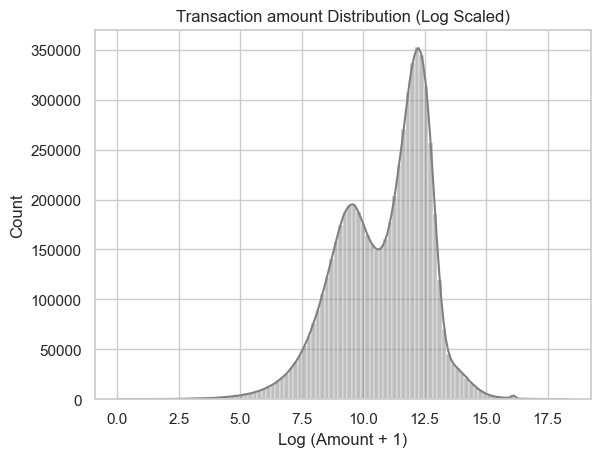

In [16]:
sns.histplot(np.log1p(df["amount"]), bins = 100 , kde = True , color = "grey")
plt.title("Transaction amount Distribution (Log Scaled)")
plt.xlabel("Log (Amount + 1)")
plt.show()

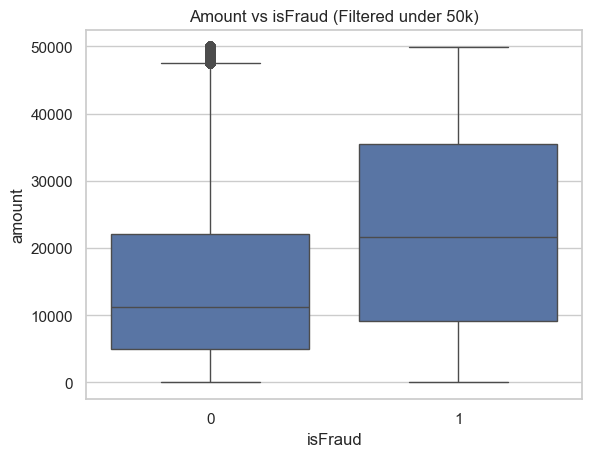

In [17]:
sns.boxplot(data = df[df["amount"]<50000] , x = "isFraud", y= "amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [18]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [19]:
(df["balanceDiffOrig"]<0)

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Name: balanceDiffOrig, Length: 6362620, dtype: bool

In [20]:
(df["balanceDiffOrig"]<0).sum()

1399253

In [21]:
(df["balanceDiffDest"]<0).sum()

1238864

In [22]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


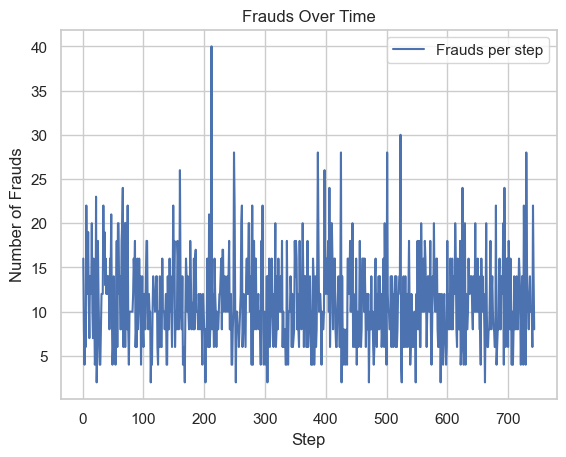

In [23]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Frauds per step")
plt.xlabel("Step")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.legend()
plt.show()


In [24]:
df.drop(columns = "step",inplace = True)

In [25]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [26]:
top_senders = df["nameOrig"].value_counts().head(10)

In [27]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [28]:
top_recivers = df["nameDest"].value_counts().head(10)

In [29]:
top_recivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [30]:
Fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts()

In [31]:
Fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
              ..
C570536992     1
C980546604     1
C58682758      1
C351713185     1
C1280323807    1
Name: count, Length: 8213, dtype: int64

In [32]:
Fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [33]:
Fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [34]:
Fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [35]:
Fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

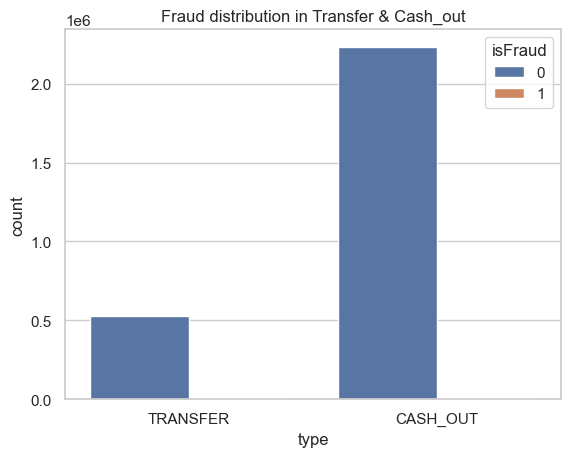

In [36]:
sns.countplot( data = Fraud_types, x = "type", hue = "isFraud")
plt.title("Fraud distribution in Transfer & Cash_out")
plt.show()

In [37]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

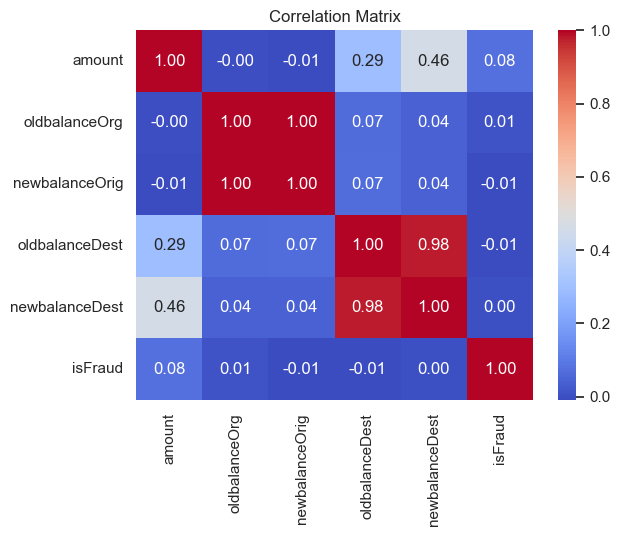

In [38]:
sns.heatmap(corr , annot = True ,cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [39]:
zero_after_transfer = df[
(df["oldbalanceOrg"]>0)
&(df["newbalanceOrig"]==0)
&(df["type"].isin(["TRANSFER","CASH_OUT"]))
]


In [40]:
len(zero_after_transfer)

1188074

In [41]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [42]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [44]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [45]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis = 1)

In [46]:
df_model

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,9839.64,0.00
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,1864.28,0.00
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,181.00,-21182.00
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,339682.13,339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,6311409.28,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,6311409.28,6311409.27
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,850002.52,0.00


In [62]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [64]:
y = df_model["isFraud"]
X = df_model.drop("isFraud",axis = 1)

In [65]:
X_Train,X_Test, Y_Train, Y_Test = train_test_split(X,y , test_size =.3, stratify= y) 

In [67]:
preprocessor = ColumnTransformer(
    transformers = [
        ("num",StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop = "first"),categorical)
    ],
    remainder = "drop")

In [68]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf",LogisticRegression(class_weight = "balanced", max_iter = 1000))
    ])

In [69]:
pipeline.fit(X_Train,Y_Train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [82]:
y_pred = pipeline.predict(X_Test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
print(classification_report(Y_Test , y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [87]:
confusion_matrix(Y_Test , y_pred)

array([[1805158,  101164],
       [    129,    2335]], dtype=int64)

In [91]:
pipeline.score(X_Test , Y_Test)*100

94.69332863925028

In [93]:
import joblib

joblib.dump(pipeline , "Fraud_detection_pipeline.pkl")


['Fraud_detection_pipeline.pkl']